In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [8]:
vegi_df = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/vegis_traindata.csv")
vegi_df = vegi_df.drop(columns=["Unnamed: 0", "green pixels", "Image"])
vegi_df.head()

vegi_encoded_df = vegi_df.copy()

vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte', 'Label'] = 0
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel', 'Label'] = 1
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel', 'Label'] = 2
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte_Trieb', 'Label'] = 3
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel_Trieb', 'Label'] = 4
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel_Trieb', 'Label'] = 5

vegi_encoded_df['Label'] = vegi_encoded_df['Label'].astype('int')
vegi_encoded_df['Label'].value_counts()

Label
1    496
2    445
0    401
3    357
4    245
5    193
Name: count, dtype: int64

In [9]:
vegi_df.describe()

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
count,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000
mean,176.591015,105.410856,115.806738,85.354235,54.713149,801.182967,0.553927,0.490246,69.897052,8.184772
std,65.186877,46.861864,27.783938,21.902030,19.126882,1919.606598,0.278630,0.283834,77.187534,6.821158
min,50.000000,12.000000,41.000000,22.000000,10.000000,0.000000,0.000000,0.007174,1.000000,2.259036
25%,125.000000,65.000000,101.000000,73.000000,44.000000,0.000000,0.383558,0.219733,22.000000,4.998657
50%,176.000000,100.000000,118.000000,85.000000,54.000000,0.000000,0.679862,0.489078,45.000000,6.518213
75%,237.000000,136.000000,136.000000,98.000000,66.000000,153.000000,0.779920,0.785004,81.000000,8.569782
max,348.000000,255.000000,193.000000,150.000000,147.000000,12510.000000,0.953143,0.897387,504.000000,82.514793


In [10]:
X = vegi_encoded_df.iloc[:, 0:10]
y = vegi_encoded_df.iloc[:, 10:11]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)

In [11]:
print(X_train.shape)
print(X_val.shape)


(1923, 10)
(214, 10)


In [12]:
pipe_logClf = make_pipeline(StandardScaler(), 
                            PolynomialFeatures(2), 
                            LogisticRegression(penalty='l2', tol=0.001, solver='lbfgs', max_iter=25000, multi_class='multinomial'))
pipe_logClf

In [14]:
pipe_logClf.fit(X_train, y_train)
pred_val = pipe_logClf.predict(X_val)

c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
pred_train = pipe_logClf.predict(X_train)
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_val = accuracy_score(y_val, pred_val)
print(f"Accuracy Train: {accuracy_train}\nAccuracy Val: {accuracy_val}")

number_correct_valdata = accuracy_val = accuracy_score(y_val, pred_val, normalize=False)
print(f"Number Correct Predicions Test: {number_correct_valdata}\n")

Accuracy Train: 0.9786791471658867
Accuracy Val: 0.8598130841121495
Number Correct Predicions Test: 184



Vegis TRAIN
[[ 601   18   79    6   17   68]
 [  27  746   19    0   92    3]
 [  40    8  678    4   17   11]
 [  50    0    0 1148    0   42]
 [   2  100    3    5  514    5]
 [  35    3   26   59   18  441]]


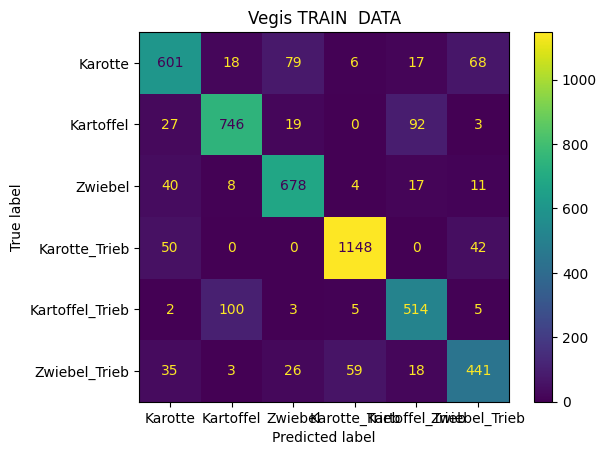

In [48]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train_scaled,
    y_train_clean,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb', 'Kartoffel_Trieb', 'Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TRAIN  DATA")

print("Vegis TRAIN")
print(disp.confusion_matrix)

Test model with Testdata

In [ ]:
y_vegi_test_pred = pipe_lgr_3.predict(X_vegi_test)

accuracy_testdata = accuracy_score(y_vegi_test, y_vegi_test_pred)
print(f"Accuracy Test: {accuracy_testdata}\n")

number_correct_testdata = accuracy_score(y_vegi_test, y_vegi_test_pred, normalize=False)
print(f"Number Correct Predicions Test: {number_correct_testdata}\n")